In [26]:
# Loading Data

import pandas as pd

bike_sharing_data = pd.read_csv('bike_sharing_data.csv')

bike_sharing_data

,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_fall,season_spring,season_summer,season_winter
0,0,0,2,0.344167,0.363625,0.805833,0.160446,985,0,1,0,0
1,0,0,2,0.363478,0.353739,0.696087,0.248539,801,0,1,0,0
2,0,1,1,0.196364,0.189405,0.437273,0.248309,1349,0,1,0,0
3,0,1,1,0.200000,0.212122,0.590435,0.160296,1562,0,1,0,0
4,0,1,1,0.226957,0.229270,0.436957,0.186900,1600,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
726,0,1,2,0.254167,0.226642,0.652917,0.350133,2114,0,1,0,0
727,0,1,2,0.253333,0.255046,0.590000,0.155471,3095,0,1,0,0
728,0,0,2,0.253333,0.242400,0.752917,0.124383,1341,0,1,0,0
729,0,0,1,0.255833,0.231700,0.483333,0.350754,1796,0,1,0,0


In [27]:
# Training Model

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.linear_model import PoissonRegressor

features = bike_sharing_data.drop(columns=['cnt'])
target  = bike_sharing_data['cnt']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

poisson_regressor = PoissonRegressor(max_iter=1000)

poisson_regressor.fit(features, target)

predictions = poisson_regressor.predict(features)

mse = mean_squared_error(target, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(target, predictions)
r2 = r2_score(target, predictions)
explained_variance = explained_variance_score(target, predictions)

In [28]:
# Printing Stats

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"Explained Variance Score: {explained_variance}")

Mean Squared Error (MSE): 1852055.4621398125
Root Mean Squared Error (RMSE): 1360.9024440200747
Mean Absolute Error (MAE): 1153.1959722820134
R-squared (R2): 0.5058094351492075
Explained Variance Score: 0.5058094351492861


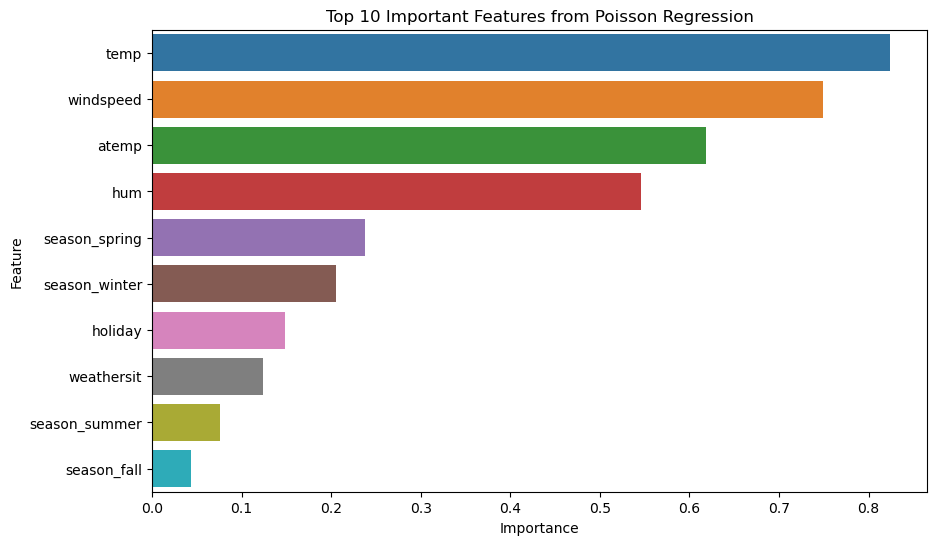

In [29]:
# Printing Feature contribution in prediction

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

features_list = features.columns.tolist()
coefficients = poisson_regressor.coef_

feature_importance_df = pd.DataFrame({
    'Feature': features_list,
    'Coefficient': coefficients
})

feature_importance_df['Importance'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Important Features from Poisson Regression')
plt.show()


In [30]:
# Saving Trained Model
import pickle

with open('./models/poissons_model_regression.pkl', 'wb') as file:
    pickle.dump(poisson_regressor, file)